In [3]:
!pip install pandas
!pip install imblearn
!pip install seaborn
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 558.5 kB/s eta 0:00:01
   ------------------------ --------------- 184.3/294.9 kB 1.1 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 k

In [8]:
# Importing Data
df=pd.read_csv("C:/Users/shrik/OneDrive/Desktop/Mrunal/Data_associate/python_project/INvideos.csv")
df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
2,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
3,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...
4,il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37346,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37347,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37348,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37349,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...


In [9]:
# Data Cleaning and Preparation
df = df.drop(['video_id', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'], axis=1)


In [10]:
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,Presenting Sharry Mann latest Punjabi Song Cu...
1,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
2,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,This video showcases the difference between pe...
3,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,why Samantha became EMOTIONAL @ Samantha naga ...
4,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,Watch MCA- Middle Class Abbayi First Look Teas...
...,...,...,...,...,...,...,...,...,...,...,...
37346,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13T08:01:11.000Z,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37347,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13T11:30:04.000Z,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,"Flowers - A R Rahman Show,Book your Tickets He..."
37348,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13T05:00:02.000Z,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,Subscribe to Mazhavil Manorama now for your da...
37349,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13T15:07:49.000Z,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,Nuabohu : Story of a rustic village girl who w...


In [11]:
# Data types
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

df['publish_date'] = df['publish_time'].dt.date
df['publish_hour'] = df['publish_time'].dt.hour
df['trending_year'] = df['trending_date'].dt.year
df['trending_month'] = df['trending_date'].dt.month
df['trending_weekday'] = df['trending_date'].dt.weekday

In [12]:
# Display the first 5 rows of the dataset
df.head()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,12,2017,11,1
1,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,15,2017,11,1
2,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,This video showcases the difference between pe...,2017-11-12,7,2017,11,1
3,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,1,2017,11,1
4,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10 04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,Watch MCA- Middle Class Abbayi First Look Teas...,2017-11-10,4,2017,11,1


In [13]:

# Display the summary statistics of the dataset
df.describe()


,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,publish_hour,trending_year,trending_month,trending_weekday
count,37351,37351.000000,37351,3.735100e+04,3.735100e+04,3.735100e+04,37351.000000,37351.000000,37351.000000,37351.000000,37351.000000
mean,2018-02-26 08:32:43.128162816,21.576504,2018-02-24 17:31:22.587962880,1.060490e+06,2.708342e+04,1.665102e+03,2677.069101,10.608712,2017.757490,5.298011,3.018232
min,2017-11-14 00:00:00,1.000000,2017-05-27 20:27:30,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,2017.000000,1.000000,0.000000
25%,2018-01-02 00:00:00,23.000000,2017-12-31 04:16:32,1.239140e+05,8.645000e+02,1.080000e+02,81.000000,6.000000,2018.000000,2.000000,1.000000
50%,2018-02-25 00:00:00,24.000000,2018-02-23 08:16:31,3.045760e+05,3.069000e+03,3.260000e+02,329.000000,11.000000,2018.000000,4.000000,3.000000
75%,2018-04-24 00:00:00,24.000000,2018-04-22 21:44:57,7.993175e+05,1.377450e+04,1.019500e+03,1285.000000,14.000000,2018.000000,6.000000,5.000000
max,2018-06-14 00:00:00,43.000000,2018-06-13 18:05:15,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,23.000000,2018.000000,12.000000,6.000000
std,NaN,6.556657,NaN,3.184974e+06,9.714630e+04,1.607639e+04,14868.509716,5.222729,0.428607,3.863320,2.006633


In [14]:
# Check for missing values in the dataset
df.isnull().sum()


trending_date         0
title                 0
channel_title         0
category_id           0
publish_time          0
tags                  0
views                 0
likes                 0
dislikes              0
comment_count         0
description         561
publish_date          0
publish_hour          0
trending_year         0
trending_month        0
trending_weekday      0
dtype: int64

In [15]:
# Drop null values
df = df.dropna()

In [16]:
# Recheck Null values after deleting it.
df.isnull().sum()


trending_date       0
title               0
channel_title       0
category_id         0
publish_time        0
tags                0
views               0
likes               0
dislikes            0
comment_count       0
description         0
publish_date        0
publish_hour        0
trending_year       0
trending_month      0
trending_weekday    0
dtype: int64

In [17]:
# Check for duplicate rows in the dataset
df.duplicated().sum()


4229

In [18]:
# Drop duplicate rows
df = df.drop_duplicates()

In [13]:
# Recheck for duplicate rows in the dataset
df.duplicated().sum()


0

In [19]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [22]:
# Save the cleaned dataset to a CSV file
df.to_csv("C:/Users/shrik/OneDrive/Desktop/Mrunal/Data_associate/python_project/INvideos_cleanedNew.csv", index=False)

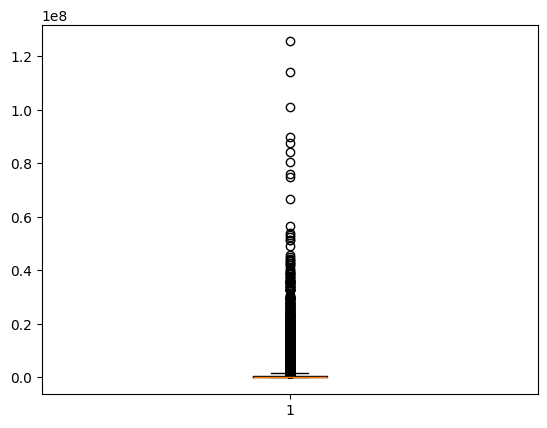

In [23]:
# Identify outliers in the 'views' column using box plot
plt.boxplot(df['views'])
plt.show()

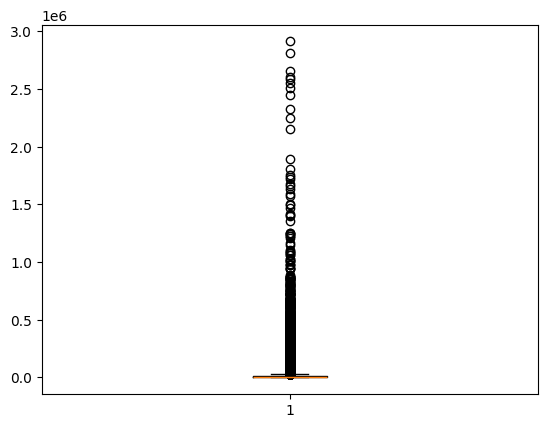

In [24]:
# Identify outliers in the 'likes' column using box plot
plt.boxplot(df['likes'])
plt.show()

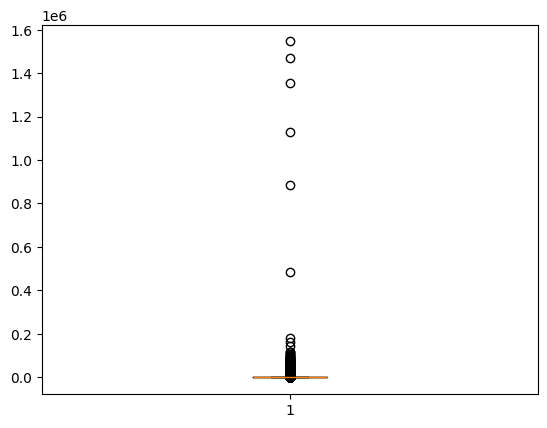

In [25]:
# Identify outliers in the 'dislikes' column using box plot
plt.boxplot(df['dislikes'])
plt.show()


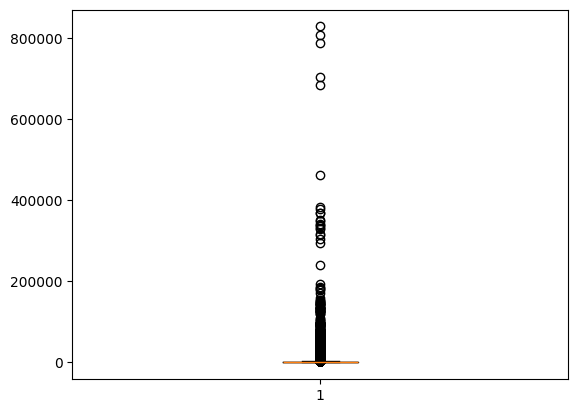

In [26]:
# Identify outliers in the 'comment_count' column using box plot
plt.boxplot(df['comment_count'])
plt.show()

In [27]:
# Define a function to remove outliers based on the interquartile range (IQR)
def remove_outliers(column):
    q1 = np.percentile(column, 25)
    q3 = np.percentile(column, 75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    return column[(column >= q1 - threshold) & (column <= q3 + threshold)]


In [28]:
# Remove outliers from the 'views' column
df['views'] = remove_outliers(df['views'])

In [29]:
# Remove outliers from the 'likes' column
df['likes'] = remove_outliers(df['likes'])

In [30]:
# Remove outliers from the 'dislikes' column
df['dislikes'] = remove_outliers(df['dislikes'])

In [31]:
# Remove outliers from the 'comment_count' column
df['comment_count'] = remove_outliers(df['comment_count'])

In [32]:
# Reset the index of the DataFrame
df = df.reset_index(drop=True)

In [33]:
df

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,NaN,798.0,882.0,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,12,2017,11,1
1,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,15,2017,11,1
2,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,NaN,1624.0,2684.0,This video showcases the difference between pe...,2017-11-12,7,2017,11,1
3,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,1,2017,11,1
4,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10 04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",NaN,NaN,NaN,NaN,Watch MCA- Middle Class Abbayi First Look Teas...,2017-11-10,4,2017,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,2018-06-14,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,24,2018-06-08 13:54:39,"funny videos|""hotels""|""comedy""|""comedy video""|...",NaN,NaN,NaN,NaN,Maggu is preparing for Sharda University inter...,2018-06-08,13,2018,6,3
32557,2018-06-14,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,17,2018-06-13 03:09:21,"wwe|""world wrestling entertainment""|""wrestling...",770873.0,13316.0,552.0,1175.0,The Miz serves as special guest referee in thi...,2018-06-13,3,2018,6,3
32558,2018-06-14,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,1,2018-06-11 06:50:41,"Dharma|""Dharma Productions""|""Dhadak""|""Janhvi K...",NaN,NaN,NaN,NaN,"When two worlds collide, they become oneDhadak...",2018-06-11,6,2018,6,3
32559,2018-06-14,What If PubG Was Made In India ?,Angry Prash,23,2018-06-11 08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423.0,NaN,NaN,NaN,This funny video is about what if players unkn...,2018-06-11,8,2018,6,3


In [34]:
# Count the number of unique values in the 'category_id' column
category_counts = df['category_id'].value_counts()

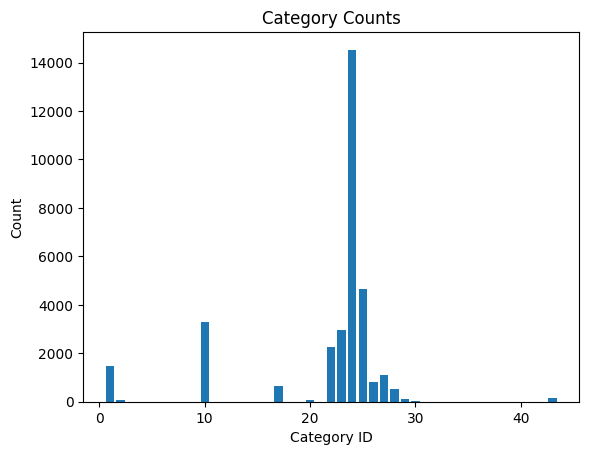

In [35]:
# Check whether data is balance or imbalanced.
#(If the bar chart shows that the data is evenly distributed across categories, then we can say that the data is balanced. If the chart shows that the data is unevenly distributed across categories, then we can say that the data is imbalanced.)
# Plot a bar chart of the category counts
plt.bar(category_counts.index, category_counts.values)
plt.title('Category Counts')
plt.xlabel('Category ID')
plt.ylabel('Count')
plt.show()

In [36]:
# Converting Imbalanced into Balanced data
# Separate the features and target variable
X = df.drop('category_id', axis=1)
y = df['category_id']


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Perform random undersampling on the training set
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [39]:
# Combine the resampled X and y into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled)], axis=1)

In [42]:
# Save the balanced dataset to a CSV file
df_resampled.to_csv("C:/Users/shrik/OneDrive/Desktop/Mrunal/Data_associate/python_project/INvideos_balancedNew.csv", index=False)

In [43]:
# To view the first 5 rows of the dataset
df.head()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327.0,NaN,798.0,882.0,Presenting Sharry Mann latest Punjabi Song Cu...,2017-11-12,12,2017,11,1
1,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988.0,2011.0,243.0,149.0,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,2017-11-12,15,2017,11,1
2,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680.0,NaN,1624.0,2684.0,This video showcases the difference between pe...,2017-11-12,7,2017,11,1
3,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015.0,492.0,293.0,66.0,why Samantha became EMOTIONAL @ Samantha naga ...,2017-11-13,1,2017,11,1
4,2017-11-14,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10 04:29:50,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",NaN,NaN,NaN,NaN,Watch MCA- Middle Class Abbayi First Look Teas...,2017-11-10,4,2017,11,1


In [44]:
# To view the last 5 rows of the dataset
df.tail()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
32556,2018-06-14,Engineering Girls | Web Series | S01E02 - Ghar...,The Timeliners,24,2018-06-08 13:54:39,"funny videos|""hotels""|""comedy""|""comedy video""|...",NaN,NaN,NaN,NaN,Maggu is preparing for Sharda University inter...,2018-06-08,13,2018,6,3
32557,2018-06-14,Rusev vs. Samoa Joe - with Special Guest Refer...,WWE,17,2018-06-13 03:09:21,"wwe|""world wrestling entertainment""|""wrestling...",770873.0,13316.0,552.0,1175.0,The Miz serves as special guest referee in thi...,2018-06-13,3,2018,6,3
32558,2018-06-14,Dhadak | Official Trailer | Janhvi & Ishaan | ...,Dharma Productions,1,2018-06-11 06:50:41,"Dharma|""Dharma Productions""|""Dhadak""|""Janhvi K...",NaN,NaN,NaN,NaN,"When two worlds collide, they become oneDhadak...",2018-06-11,6,2018,6,3
32559,2018-06-14,What If PubG Was Made In India ?,Angry Prash,23,2018-06-11 08:37:21,"pubg|""PlayerUnknown's Battlegrounds""|""pubg mob...",1214423.0,NaN,NaN,NaN,This funny video is about what if players unkn...,2018-06-11,8,2018,6,3
32560,2018-06-14,Funny Ramzan Scenes Part - 2 | Hyderabadi Come...,Warangal Diaries,23,2018-06-13 10:16:21,"warangal diaries|""latest""|""funny""|""comedy""|""Ba...",132055.0,11170.0,393.0,2107.0,(Earphone Use Is Recommended)!!Funny Ramzan Sc...,2018-06-13,10,2018,6,3


In [45]:

# To view the shape of the dataset
df.shape


(32561, 16)

In [46]:

# To view the column names of the dataset
df.columns



Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'description', 'publish_date', 'publish_hour', 'trending_year',
       'trending_month', 'trending_weekday'],
      dtype='object')

In [47]:
# To view the data types of the columns
df.dtypes



trending_date       datetime64[ns]
title                       object
channel_title               object
category_id                  int64
publish_time        datetime64[ns]
tags                        object
views                      float64
likes                      float64
dislikes                   float64
comment_count              float64
description                 object
publish_date                object
publish_hour                 int32
trending_year                int32
trending_month               int32
trending_weekday             int32
dtype: object

In [48]:
# To view the summary statistics of the dataset
df.describe()


,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,publish_hour,trending_year,trending_month,trending_weekday
count,32561,32561.000000,32561,2.882800e+04,27607.000000,28665.000000,28339.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,2018-02-19 02:22:10.941924352,21.602316,2018-02-17 10:45:34.841589760,3.667399e+05,4634.831890,430.473853,493.029712,10.627898,2017.728602,5.401646,3.035380
min,2017-11-14 00:00:00,1.000000,2017-05-27 20:27:30,4.024000e+03,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,0.000000
25%,2017-12-28 00:00:00,23.000000,2017-12-25 18:07:25,1.018555e+05,639.000000,84.000000,57.000000,6.000000,2017.000000,2.000000,1.000000
50%,2018-02-14 00:00:00,24.000000,2018-02-12 08:52:42,2.256140e+05,1947.000000,229.000000,219.000000,11.000000,2018.000000,4.000000,3.000000
75%,2018-04-14 00:00:00,24.000000,2018-04-12 16:00:27,5.060798e+05,5848.500000,595.000000,663.000000,14.000000,2018.000000,11.000000,5.000000
max,2018-06-14 00:00:00,43.000000,2018-06-13 18:05:15,1.676026e+06,29549.000000,2209.000000,2858.000000,23.000000,2018.000000,12.000000,6.000000
std,NaN,6.525478,NaN,3.663131e+05,6261.014952,490.160239,634.549364,5.231037,0.444688,4.058166,2.016876


In [49]:

# To view the number of null values in each column
df.isnull().sum()

trending_date          0
title                  0
channel_title          0
category_id            0
publish_time           0
tags                   0
views               3733
likes               4954
dislikes            3896
comment_count       4222
description            0
publish_date           0
publish_hour           0
trending_year          0
trending_month         0
trending_weekday       0
dtype: int64

In [50]:
# To drop the duplicate rows
df.drop_duplicates(inplace=True)

In [51]:
# To drop the rows with missing values
df.dropna(inplace=True)

In [52]:
# To change the data type of a column
df['views'] = df['views'].astype(int)

In [53]:
# To view the total number of videos
len(df)

25747

In [54]:
# To view the top 10 videos with the most views
df.nlargest(10, 'views')

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
19819,2018-03-09,पवन सिंह करेंगे ज्योति सिंह से कल बलिया में शा...,Lehren Bhojpuri,24,2018-03-05 04:53:39,"pawan singh|""pawan singh marriage""|""pawan sing...",1674895,3166.0,1550.0,692.0,Powerstar of Bhojpuri industry Pawan Singh is ...,2018-03-05,4,2018,3,4
29070,2018-05-19,Uppum Mulakum│Flowers│EP# 605,Flowers Comedy,24,2018-05-17 14:00:01,"flowers tv|""uppum mulakum""|""uppum""|""biju sopan...",1673735,11592.0,1286.0,2195.0,Watch Full Episode Here :- Watch Flowers TV Li...,2018-05-17,14,2018,5,5
29888,2018-05-25,20 CRAZY MARKER HACKS THAT WORK MAGIC,5-Minute Crafts,26,2018-05-23 07:30:00,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",1673475,18530.0,1436.0,885.0,You should totally check out these awesome mar...,2018-05-23,7,2018,5,4
20101,2018-03-10,Trump Scolds Sarah Huckabee Sanders For... Bei...,The Late Show with Stephen Colbert,24,2018-03-09 04:50:01,"The Late Show|""Late Show""|""Stephen Colbert""|""S...",1672290,22084.0,781.0,2204.0,Trump was angry with his Press Secretary for b...,2018-03-09,4,2018,3,5
11713,2018-01-18,Sarah Huckabee Sanders Explains Why Trump Isn'...,The Late Show with Stephen Colbert,24,2018-01-17 08:35:00,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",1671864,24359.0,1100.0,2197.0,Stephen has a counterargument to the Press Sec...,2018-01-17,8,2018,1,3
22057,2018-03-23,Thrilling Last Over Of Eliminator 1 | Peshawar...,Talk Shows Central,25,2018-03-20 18:43:27,"Psl|""Pakistan Super League""|""Psl 2018""|""psl 20...",1668712,11342.0,973.0,2084.0,Thrilling Last Over Of Eliminator 1 | Peshawar...,2018-03-20,18,2018,3,4
17230,2018-02-20,शिवरायांवर आक्षेपार्ह बोलणाऱ्या छिंदमची बोलती ...,VIRAL IN INDIA,22,2018-02-17 17:01:54,अहमदनगर : भाजपच्या उपमहापौरांचं शिवरायांबाबत आ...,1668397,19386.0,1695.0,1797.0,Don't Forget to SUBSCIRBE to our YouTube Chann...,2018-02-17,17,2018,2,1
13534,2018-01-28,JILA CHAMPARAN - Superhit FULL HD Bhojpuri Mov...,Team Films Bhojpuri,10,2018-01-26 02:00:06,"JILA CHAMPARAN|""जिला चम्पारण""|""Khesari Lal Yad...",1667706,7213.0,1801.0,997.0,JILA CHAMPARAN - Superhit FULL HD Bhojpuri Mov...,2018-01-26,2,2018,1,6
25297,2018-04-21,Pawan Kalyan at Film Chamber over comments on ...,TV9 Telugu,25,2018-04-20 17:09:49,"tv9|""tv9 live""|""tv9 news""|""live tv9""|""tv9 telu...",1666064,0.0,0.0,102.0,Pawan Kalyan Press Meet at Film Chamber || Nag...,2018-04-20,17,2018,4,5
22931,2018-03-29,Golak Bugni Bank Te Batua | Official Trailer |...,Rhythm Boyz,24,2018-03-24 06:30:07,"golak|""bugni""|""bank""|""te""|""batua""|""golak bugni...",1664547,23910.0,597.0,1402.0,Rhythm Boyz Entertainment & Hayre Omjee Studio...,2018-03-24,6,2018,3,3


In [55]:

# To view the top 10 videos with the most likes
df.nlargest(10, 'likes')

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
1557,2017-11-22,TSP's Kyun Bane Crorepati ft. Sanjay Mishra | ...,The Screen Patti,24,2017-11-18 14:05:05,"kaun banega crorepati|""who wants to be a milli...",1201756,29522.0,2084.0,2478.0,What happens when Sanjay Mishra is on the hot ...,2017-11-18,14,2017,11,2
28712,2018-05-16,Yarusalem Naayaka Video Song | Abrahaminte San...,GOODWILL ENTERTAINMENTS,10,2018-05-14 13:30:04,"Yerusalem Naayaka|""Yerusalem Naayaka Video""|""Y...",500334,29521.0,661.0,2842.0,Presenting Abrahaminte Santhathikal Full Video...,2018-05-14,13,2018,5,2
7964,2017-12-26,Kalyanam Conditions Apply | Episode 4 – ‘Sorry...,Radio Mirchi Tamil,24,2017-12-23 05:30:02,"conditions apply|""mirchi senthil""|""sreeja""|""ta...",728427,29497.0,685.0,1539.0,"After his travails in the kitchen, the gym and...",2017-12-23,5,2017,12,1
8838,2018-01-01,AIB : Honest House Parties | Part 2,All India Bakchod,23,2017-12-30 05:22:49,"All India Bakchod|""AIB""|""AllIndiaBakchod""|""Tan...",1271287,29493.0,2080.0,1857.0,Paranoid Gupta decides to throw an epic house ...,2017-12-30,5,2018,1,0
31583,2018-06-07,Hamari Rich Girlfriends | SahibNoor Singh,SahibNoor Singh,24,2018-06-05 13:24:51,"hamari rich girlfriends|""ameer ladkiya""|""hot g...",407588,29469.0,911.0,2240.0,Hamari RIch Girlfriends.Like Share Comment.Dow...,2018-06-05,13,2018,6,3
7991,2017-12-27,Making of Tiger vs Wolves | Tiger Zinda Hai | ...,YRF,1,2017-12-26 13:40:07,"Salman Khan|""Katrina Kaif""|""Salman Khan Action...",1608102,29445.0,1285.0,953.0,► Subscribe Now: https://goo.gl/xs3mrY 🔔 Stay ...,2017-12-26,13,2017,12,2
26739,2018-04-30,Photoaan | Official Video | Jass Bajwa ft. DJ ...,Speed Records,10,2018-04-30 04:30:04,"desi|""speed records""|""Photoaan Jass Bajwa""|""Ph...",894791,29428.0,971.0,1434.0,Song - Photoaan \nSinger - Jass Bajwa Ft Dj Fl...,2018-04-30,4,2018,4,0
26621,2018-04-30,Photoaan | Official Video | Jass Bajwa ft. DJ ...,Speed Records,10,2018-04-30 04:30:04,"desi|""speed records""|""Photoaan Jass Bajwa""|""Ph...",894791,29426.0,971.0,1434.0,Song - Photoaan \nSinger - Jass Bajwa Ft Dj Fl...,2018-04-30,4,2018,4,0
25330,2018-04-21,Daddy ki Safayi | Harshdeep Ahuja,Harshdeep Ahuja,24,2018-04-19 08:26:22,"harshdeep ahuja|""harshdeep ahuja vines""|""harsh...",387874,29395.0,442.0,2112.0,Daddy ki Safayi | Harshdeep Ahuja\n\nSubscribe...,2018-04-19,8,2018,4,5
15328,2018-02-09,FilterCopy | When Your Friend Behaves Differen...,FilterCopy,23,2018-02-06 06:47:12,"crush|""bestfriend""|""love""|""relationship""|""Jord...",835351,29383.0,2050.0,921.0,We all have that one friend who behaves comple...,2018-02-06,6,2018,2,4


In [56]:
# To view the top 10 videos with the most dislikes
df.nlargest(10, 'dislikes')

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
29598,2018-05-23,NEERALI (നീരാളി) OFFICIAL TRAILER| Mohanlal |...,Manorama Music Songs,10,2018-05-21 01:30:01,"Latest Movie|""Malayalam Song""|""Trending Malaya...",595772,22347.0,2209.0,1834.0,Movie: Nieraali – NEERALI – നീരാളിStarring Moh...,2018-05-21,1,2018,5,2
16729,2018-02-17,Viva News - EP 10 | Snow Blooded Murder,VIVA,23,2018-02-16 07:07:57,"viva|""viva harsha""|""shanmukh jaswanth""|""sabari...",317386,9990.0,2208.0,935.0,Subscribe to Viva for more videos-\nhttp://bit...,2018-02-16,7,2018,2,5
5395,2017-12-13,పవన్ ని ఉతికి ఆరేసిన ఈ మహిళ Women Comments On ...,Cinema Politics,25,2017-12-11 06:04:39,"Cinema Politics|""Latest Videos""|""Latest Gossip...",169566,2934.0,2206.0,1580.0,పవన్ ని ఉతికి ఆరేసిన ఈ మహిళ Women Comments On ...,2017-12-11,6,2017,12,2
18375,2018-02-27,சிக்கியது CCTV ஆதாரம் - நடிகை ஸ்ரீதேவிக்கு நடந...,Thirty Seconds News,22,2018-02-25 13:47:01,"ajith|""vijay""|""vijay 62""",1508747,3390.0,2203.0,0.0,Actress Sridevi,2018-02-25,13,2018,2,1
21000,2018-03-16,సొంత మదర్స్ తో తెలుగు హీరోలు | Tollywood Heroe...,Film Report,24,2018-03-12 05:20:15,"సొంత మదర్స్ తో తెలుగు హీరోలు|""tollywood heroes...",934597,1999.0,2195.0,169.0,సొంత మదర్స్ తో తెలుగు హీరోలు \nTollywood Heroe...,2018-03-12,5,2018,3,4
2669,2017-11-28,Road Trip With Annoying Girlfriend - Vine By F...,Funk You,24,2017-11-23 09:00:02,"funk you|""annoying girlfriend""|""annoying girlf...",819571,20412.0,2193.0,1571.0,Road trip with best friends is always the best...,2017-11-23,9,2017,11,1
23076,2018-03-30,DJs | Stand Up Comedy By Rahul Subramanian,Random Chikibum,24,2018-03-26 05:58:50,"Stand up comedy|""rahul subramanian""|""rahul sta...",647520,19872.0,2193.0,0.0,I talk about why I don't like going to clubs. ...,2018-03-26,5,2018,3,4
16400,2018-02-15,Priya Prakash के Song Manikya Malaraya Poovi क...,NMF News,24,2018-02-13 14:49:15,"priya prakash varrier|""manikya malaraya poovi ...",1528629,7277.0,2192.0,0.0,Manikya Malaraya Poovi is the latest romantic ...,2018-02-13,14,2018,2,3
10017,2018-01-07,తాగి దొరికిన యాంక‌ర్ ప్ర‌దీప్ ప‌క్క‌న ఉన్న అమ...,Friday Poster,24,2018-01-02 05:26:27,తాగి దొరికిన యాంక‌ర్ ప్ర‌దీప్ ప‌క్క‌న ఉన్న అమ్...,1401098,1438.0,2191.0,413.0,తాగి దొరికిన యాంక‌ర్ ప్ర‌దీప్ ప‌క్క‌న ఉన్న అమ...,2018-01-02,5,2018,1,6
28820,2018-05-17,TVF'S HATED Talks | Benefits of Using Short Fo...,The Viral Fever,24,2018-05-15 15:43:18,"the viral fever|""tvf""|""humour""|""qtiyapa""|""come...",368865,13934.0,2190.0,1107.0,“Short forms are extremely useful” - DJ Rakesh...,2018-05-15,15,2018,5,3


In [57]:
# To view the top 10 videos with the most comments
df.nlargest(10, 'comment_count')

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
22542,2018-03-26,Vivo V9 Selfie Camera Smartphone Unboxing & Ov...,Geekyranjit,28,2018-03-23 07:25:53,"vivo v9 india|""vivo v9 unboxing""|""vivo v9""|""se...",867360,15413.0,1637.0,2856.0,Vivo V9 Android Smartphone Unboxing & Overview...,2018-03-23,7,2018,3,0
5274,2017-12-12,Just miss ra | Exam Results | my village show,My Village Show,23,2017-12-07 12:21:27,"my village show|""anji mama""|""raju""|""sriram sri...",631820,18880.0,717.0,2854.0,follow us on social media :\n\nmy village show...,2017-12-07,12,2017,12,1
24307,2018-04-14,Pawan Kalyan Full Speech | Rangasthalam Vijayo...,Mythri Movie Makers,24,2018-04-13 16:24:54,"Pawan Kalyan Full Speech|""Rangasthalam Vijayot...",1475449,28882.0,2097.0,2851.0,Pawan Kalyan Full Speech at Rangasthalam Vijay...,2018-04-13,16,2018,4,5
18119,2018-02-25,"Tech Talks #435 - 16000mAh Phone, Land Rover P...",Technical Guruji,28,2018-02-24 16:50:06,"16000mAh Phone|""Land Rover Phone""|""Doogee V""|""...",201556,24504.0,651.0,2849.0,TG Deals@ https://tg.deals/ \nNew Channel: h...,2018-02-24,16,2018,2,6
13235,2018-01-26,भारत की ये सच्चाई जानकर आपके रोंगटे खड़े हो जाय...,Rahasya,27,2018-01-25 10:39:31,"Facts India|""Indian Facts""|""Facts about India""...",80539,9662.0,525.0,2846.0,Republic day special video jai hind\n\nwe want...,2018-01-25,10,2018,1,4
19377,2018-03-06,Life of Electronics? Life of Smartphone or Lap...,Technical Guruji,28,2018-03-05 10:31:03,"electronics|""die""|""lifespan""|""durable""|""failur...",167669,14744.0,620.0,2845.0,"Namaskaar Dosto, is video mein maine aapse Ele...",2018-03-05,10,2018,3,1
21076,2018-03-17,"Ravish Kumar Prime Time, 14 March18, UP-Bihar ...",Voice of Dissent,25,2018-03-14 15:51:00,"Ravish|""Ravish kumar""|""Prime time 14 March 201...",935444,16040.0,1373.0,2843.0,"Ravish Kumar Prime Time , UP, Bihar Bypolls Re...",2018-03-14,15,2018,3,5
28712,2018-05-16,Yarusalem Naayaka Video Song | Abrahaminte San...,GOODWILL ENTERTAINMENTS,10,2018-05-14 13:30:04,"Yerusalem Naayaka|""Yerusalem Naayaka Video""|""Y...",500334,29521.0,661.0,2842.0,Presenting Abrahaminte Santhathikal Full Video...,2018-05-14,13,2018,5,2
17744,2018-02-23,How To Increase Your Will Power | Motivational...,Dr. Vivek Bindra: Motivational Speaker,27,2018-02-22 13:59:01,"Motivation|""motivational speaker""|""Best Motiva...",185466,23252.0,375.0,2841.0,In this video Dr Vivek Bindra talks about how ...,2018-02-22,13,2018,2,4
32175,2018-06-11,Blindtest Oneplus6 మీ అదృష్టాన్ని పరీక్షించుకోండి,Prasadtechintelugu,28,2018-06-10 04:02:04,"prasadtechintelugu|""prasad""|""techtelugu""|""tech...",84056,18573.0,110.0,2840.0,Enter Here : https://gleam.io/Cfjoz/win-a-onep...,2018-06-10,4,2018,6,0


In [84]:
# To view the correlation between the variables
df.corr()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
trending_date,1.000000,-0.050975,0.014116,0.003506,0.999320,0.032374,0.107854,0.114833,0.082528,0.103415,-0.018755,0.999739,-0.023059,0.737467,-0.476660,-0.002910
title,-0.050975,1.000000,-0.021392,-0.001832,-0.051652,0.155214,-0.027742,-0.142096,-0.034120,-0.141700,0.414814,-0.051549,0.011032,-0.019498,0.001775,-0.001171
channel_title,0.014116,-0.021392,1.000000,0.008442,0.015216,0.188621,-0.008821,-0.060172,-0.053782,-0.041708,-0.007436,0.014983,0.053655,0.022983,-0.023580,0.003171
category_id,0.003506,-0.001832,0.008442,1.000000,0.004783,0.025893,-0.156360,-0.207321,-0.096481,-0.048451,-0.017372,0.004646,0.031267,-0.014590,0.020348,0.000290
publish_time,0.999320,-0.051652,0.015216,0.004783,1.000000,0.033100,0.101205,0.112468,0.077587,0.102037,-0.018918,0.999680,-0.022946,0.736701,-0.476048,-0.001424
tags,0.032374,0.155214,0.188621,0.025893,0.033100,1.000000,-0.014533,0.016178,-0.014908,0.034604,0.093539,0.032829,0.013215,0.019709,-0.009394,0.001828
views,0.107854,-0.027742,-0.008821,-0.156360,0.101205,-0.014533,1.000000,0.478814,0.680722,0.364500,-0.014472,0.101304,0.008340,0.100191,-0.078447,-0.011348
likes,0.114833,-0.142096,-0.060172,-0.207321,0.112468,0.016178,0.478814,1.000000,0.539840,0.717653,-0.104464,0.112261,-0.030939,0.078705,-0.047627,0.006701
dislikes,0.082528,-0.034120,-0.053782,-0.096481,0.077587,-0.014908,0.680722,0.539840,1.000000,0.540200,-0.033210,0.077606,0.027061,0.086561,-0.073409,-0.016560
comment_count,0.103415,-0.141700,-0.041708,-0.048451,0.102037,0.034604,0.364500,0.717653,0.540200,1.000000,-0.098342,0.101630,0.001296,0.061438,-0.030552,0.004376


<Axes: xlabel='views', ylabel='likes'>

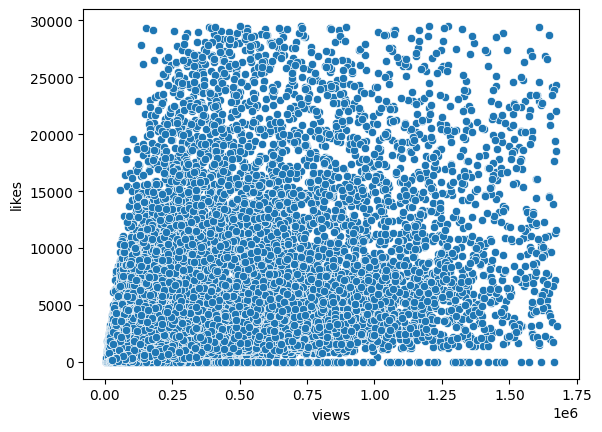

In [64]:
# To plot the relationship between views and likes
sns.scatterplot(x='views', y='likes', data=df)

<Axes: xlabel='views', ylabel='dislikes'>

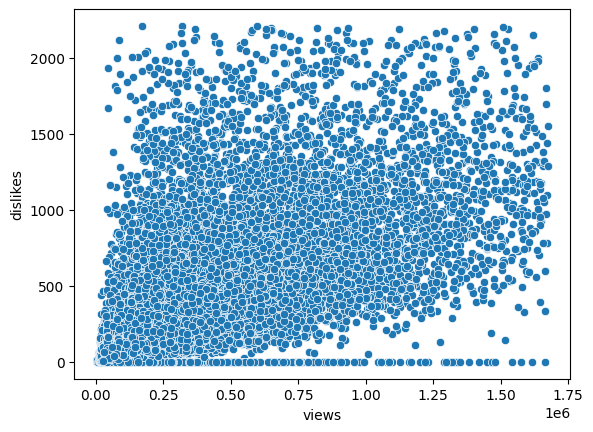

In [65]:
# To plot the relationship between views and dislikes
sns.scatterplot(x='views', y='dislikes', data=df)

<Axes: xlabel='views', ylabel='comment_count'>

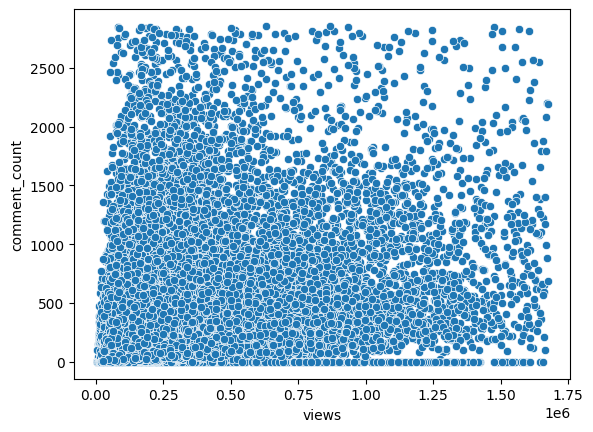

In [66]:
# To plot the relationship between views and comment count
sns.scatterplot(x='views', y='comment_count', data=df)

<Axes: >

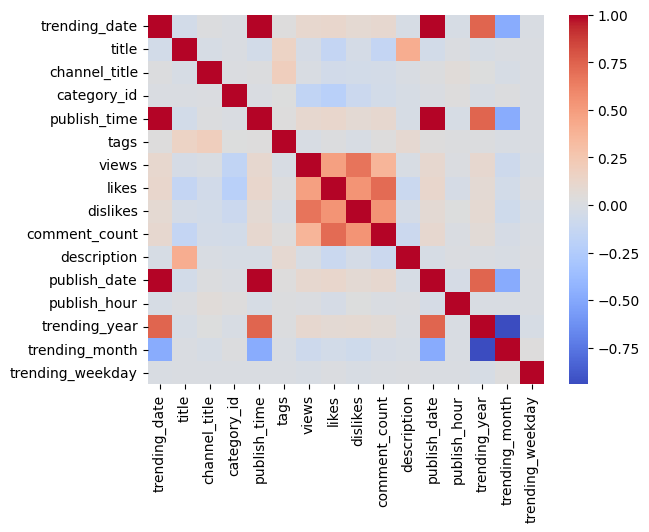

In [119]:
# To plot the correlation matrix
sns.heatmap(df.corr(), annot=None, cmap='coolwarm')


In [97]:
# Identify numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']


In [98]:
# Perform label encoding
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [99]:
# Perform MinMax scaling
scaler = MinMaxScaler()

for col in cat_cols:
    df[col] = scaler.fit_transform(df[[col]])


In [100]:
# Analyze the scaled data

In [101]:
# To view the first 5 rows of the encoded dataset
df.head()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
1,2017-11-14,0.634609,0.745247,24,2017-11-12 15:48:08,0.408673,473988,2011.0,243.0,149.0,0.757232,0.023148,15,2017,11,1
3,2017-11-14,0.751920,0.238783,24,2017-11-13 01:14:16,0.154906,464015,492.0,293.0,66.0,0.824119,0.027778,1,2017,11,1
7,2017-11-14,0.187181,0.850190,24,2017-11-13 04:42:26,0.111907,118223,520.0,53.0,23.0,0.152176,0.027778,4,2017,11,1
11,2017-11-14,0.560797,0.017490,25,2017-11-13 09:51:59,0.366685,156085,716.0,53.0,0.0,0.512723,0.027778,9,2017,11,1
12,2017-11-14,0.508734,0.832700,24,2017-11-11 19:19:13,0.906928,472413,2611.0,250.0,174.0,0.448653,0.018519,19,2017,11,1


In [102]:
# To view the summary statistics of the scaled dataset
df.describe()


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_date,publish_hour,trending_year,trending_month,trending_weekday
count,25747,25747.000000,25747.000000,25747.000000,25747,25747.000000,2.574700e+04,25747.000000,25747.000000,25747.000000,25747.000000,25747.000000,25747.000000,25747.000000,25747.000000,25747.000000
mean,2018-02-15 14:14:35.566085120,0.511601,0.539438,22.276498,2018-02-14 03:29:59.200761344,0.510149,3.067423e+05,3861.207286,334.923797,380.286092,0.508954,0.454785,10.601585,2017.711772,5.485144,3.038024
min,2017-11-14 00:00:00,0.000000,0.000000,1.000000,2017-05-27 20:27:30,0.000000,4.024000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,0.000000
25%,2017-12-25 00:00:00,0.261775,0.255513,23.000000,2017-12-22 19:30:53,0.285281,9.182350e+04,587.000000,75.000000,49.000000,0.248446,0.208333,6.000000,2017.000000,2.000000,1.000000
50%,2018-02-09 00:00:00,0.513831,0.561217,24.000000,2018-02-07 15:42:57,0.495314,1.945080e+05,1700.000000,190.000000,183.000000,0.523912,0.425926,11.000000,2018.000000,4.000000,3.000000
75%,2018-04-03 00:00:00,0.763440,0.808365,25.000000,2018-04-02 05:42:10,0.738102,4.047795e+05,4714.500000,446.500000,503.500000,0.755947,0.675926,14.000000,2018.000000,11.000000,5.000000
max,2018-06-14 00:00:00,1.000000,1.000000,43.000000,2018-06-13 18:05:15,1.000000,1.674895e+06,29522.000000,2209.000000,2856.000000,1.000000,1.000000,23.000000,2018.000000,12.000000,6.000000
std,NaN,0.287767,0.302188,5.925010,NaN,0.276651,3.099034e+05,5325.460331,383.661070,499.617267,0.289223,0.279233,5.292534,0.452946,4.150798,2.018748


In [103]:

# To view the data types of the encoded columns
df.dtypes


trending_date       datetime64[ns]
title                      float64
channel_title              float64
category_id                  int64
publish_time        datetime64[ns]
tags                       float64
views                        int32
likes                      float64
dislikes                   float64
comment_count              float64
description                float64
publish_date               float64
publish_hour                 int32
trending_year                int32
trending_month               int32
trending_weekday             int32
dtype: object

In [104]:
# Training Model

In [105]:
# Select the relevant features
X = df[['likes', 'dislikes', 'comment_count']]
y = df['views']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [106]:
# Train the model
# Create a linear regression model
model = LinearRegression()


In [107]:
# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [108]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Compute the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)


Mean Squared Error (MSE): 50045257955.463875
R-squared (R2) Score: 0.48173790208134415


In [109]:
# Make predictions on new data
# Create a new dataset
new_data = pd.DataFrame({'likes': [10000, 5000, 2000],
                         'dislikes': [500, 1000, 250],
                         'comment_count': [1500, 300, 50]})

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
print(predictions)


[372816.80840934 671152.42963042 268041.818399  ]


In [110]:
# To calculate the accuracy of a Model trained 
# To calculate the accuracy of a model trained on the given dataset, we need to choose an appropriate metric based on the task. In this case, since we are predicting the number of views based on the number of likes, dislikes, and comments, a common metric to use is the R-squared (R2) score.

In [111]:
# Calculate the R2 score on the testing data
# The R2 score can range from 0 to 1, with 1 indicating a perfect fit. 
r2 = r2_score(y_test, y_pred)

print('R-squared (R2) Score:', r2)


R-squared (R2) Score: 0.48173790208134415


In [112]:
# Process Data into MySQL 8.0 command line client
# Partioning of Data into Hive
# Visualize the Data into Tableau